# `Let's Grow More-INTERNSHIP`

## <u>Iris Flower Classification<u>

#### Importing the requisite libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the Iris Dataset

In [2]:
df_iris = pd.read_csv("iris.csv",header = 0)

In [3]:
df_iris.drop(columns='Id',inplace=True)

In [4]:
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking the null values if any

In [5]:
df_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Checking the duplicate values if any

In [6]:
df_iris.duplicated().sum()

3

In [7]:
df_iris = df_iris.drop_duplicates()

#### Data Information

In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


#### Descriptive Statistics of the Iris Dataset

In [9]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### EDA on Iris Dataset

#### Columns present in the dataset

In [10]:
df_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Checking if the data is imbalanced or not

In [11]:
df_iris['Species'].value_counts() #it's balanced dataset

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

#### Correlation among input variables

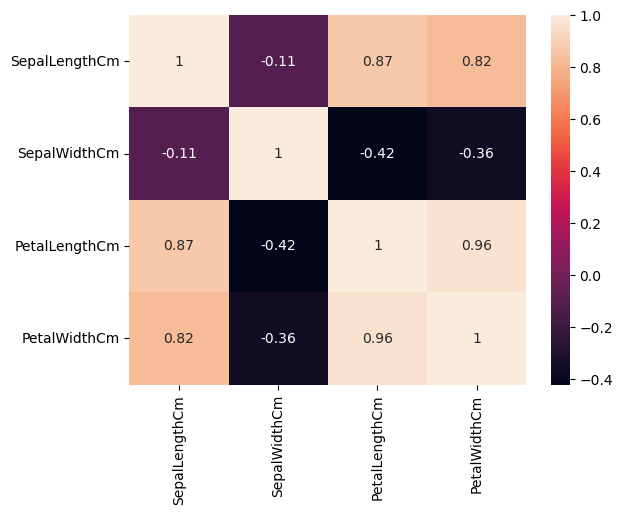

In [12]:
sns.heatmap(df_iris.corr(),annot=True)
plt.show()

#### It shows how the input variable are corelated with eachother and also shows their distribution

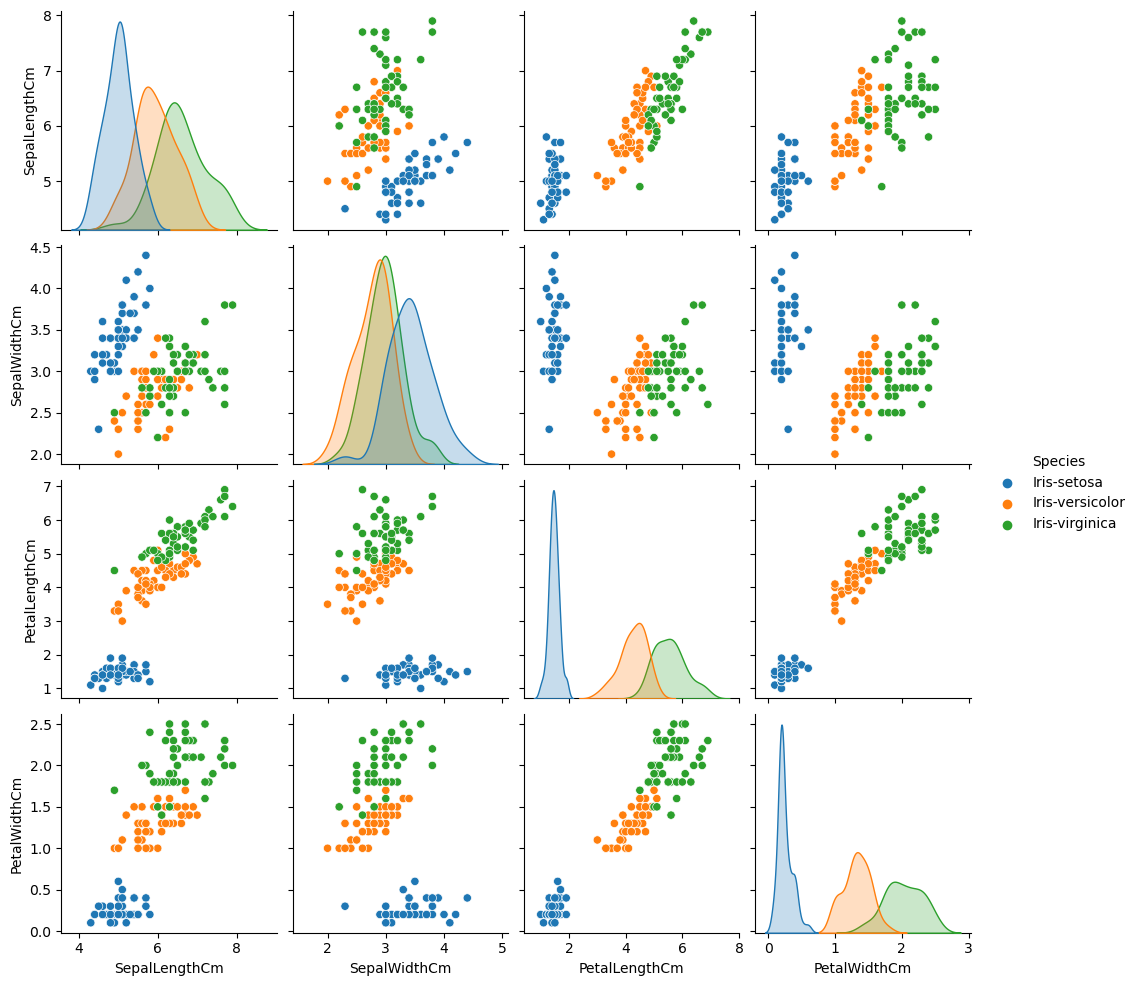

In [13]:
sns.pairplot(df_iris,hue='Species')
plt.show()

#### Probability distribution of Sepal Width among all the three species

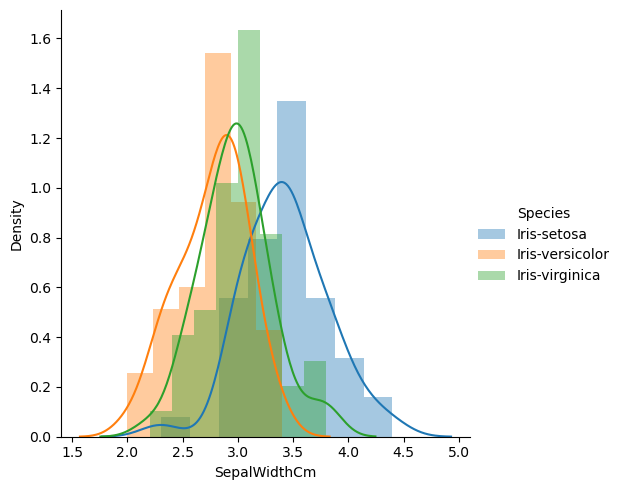

In [14]:
sns.FacetGrid(df_iris,hue="Species",size=5) \
    .map(sns.distplot,"SepalWidthCm") \
    .add_legend()
plt.show()

#### Probability distribution of Sepal Length among all the three species

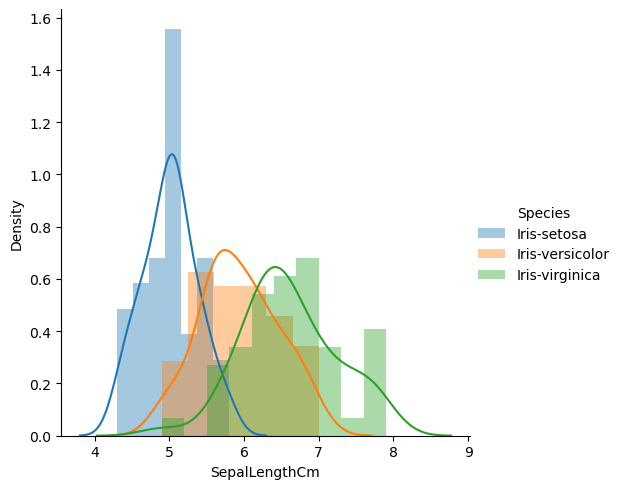

In [15]:
sns.FacetGrid(df_iris,hue="Species",size=5) \
    .map(sns.distplot,"SepalLengthCm") \
    .add_legend()
plt.show()

#### Probability distribution of Petal Width among all the three species

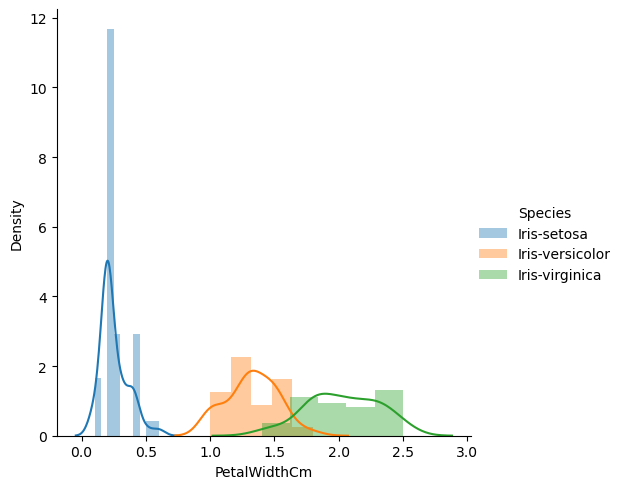

In [16]:
sns.FacetGrid(df_iris,hue="Species",size=5) \
    .map(sns.distplot,"PetalWidthCm") \
    .add_legend()
plt.show()

#### Probability distribution of Petal Length among all the three species

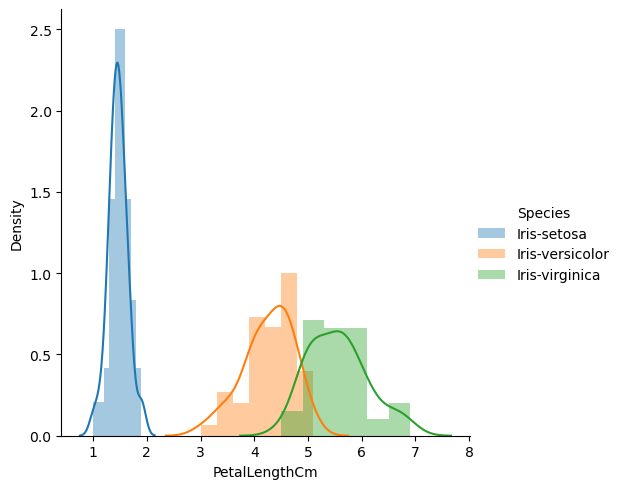

In [17]:
sns.FacetGrid(df_iris,hue="Species",size=5) \
    .map(sns.distplot,"PetalLengthCm") \
    .add_legend()
plt.show()

### Model Building

#### Importing the necessary functions of SciKIt Learn

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

#### Defining the Input and output variable

In [19]:
X = df_iris.iloc[:,:-1]
y = df_iris.iloc[:,-1]

#### Splitting the dataset into train and test dataset

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

### `Logistic Regression`

#### Creating the model object and then tuning its hyperparameters using GridSearchCV

In [21]:
model = LogisticRegression()

In [22]:
param = {'C':[0.1,1,10],'penalty':['l1','l2','none','elasticnet']}

In [23]:
grid_search = GridSearchCV(model,param,cv = 5)

#### Training the model using train dataset

In [24]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'none', 'elasticnet']})

### Model Evaluation

#### Accuracy_score on train dataset

In [25]:
print("Train accuracy:",grid_search.score(X_train,y_train))

Train accuracy: 0.9705882352941176


#### Making the prediction on test dataset using trained model

In [26]:
y_pred = grid_search.predict(X_test)

#### Accuracy_score on test dataset

In [27]:
print("Test accuracy:",accuracy_score(y_test,y_pred))

Test accuracy: 0.9555555555555556


#### Classification report: 

In [28]:
report= classification_report(y_test,y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



#### Confusion matrix:

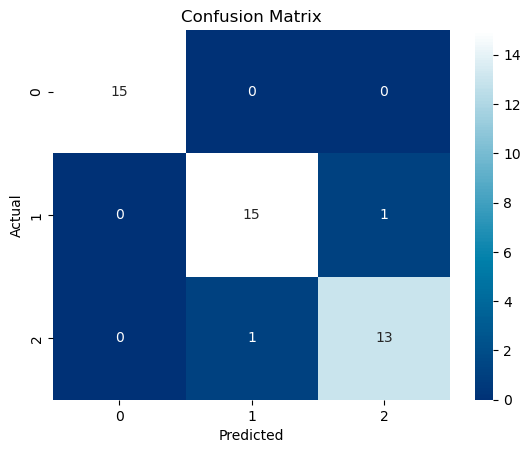

In [29]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,center=1,cmap='ocean')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### `KNN`

#### Importing the necessary function of SciKit Learn

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#### Creating the model object

In [31]:
KNN = KNeighborsClassifier(n_neighbors = 3)

#### Training the model using train dataset

In [32]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

#### Making the prediction on test dataset using trained model

In [33]:
y_pred=KNN.predict(X_test)

### Model Evaluation

#### Accuracy_score on train dataset

In [34]:
print("Train accuracy:",KNN.score(X_train,y_train))

Train accuracy: 0.9509803921568627


#### Accuracy_score on test dataset

In [35]:
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.9555555555555556


#### Classificcation report:

In [36]:
report= classification_report(y_test,y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



#### Confusion matrix:

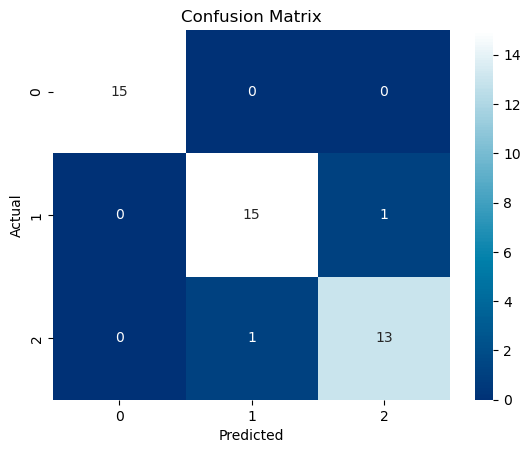

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,center=1,cmap='ocean')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()